In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Load the dataset

In [23]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

#### Get the basic information
Lets check if the data have any null or na values

In [24]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
red_wine.shape

(1599, 12)

In [26]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
# Check for null values
print(red_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [29]:
# Check for missing data  
print(red_wine.isin([np.nan]).sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Turn out the data dont have any null or n/a values. The dataset have 1599 rows and 12 columns and the data types is numberic

#### Let's do some statistic

In [30]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- The average value of `fixed acidity` is `8.31`, the highest value is `15.9` and the lowest value is `8.32`
- The average value of `volatile acidity` is `0.53`, the highest value is `1.58` and the lowest value is `0.12`
- The average value of `citric acid` is `0.27`, the highest value is `1` and the lowest value is `0`
- The average value of `residual sugar` is `2.54`, the highest value is `15.5` and the lowest value is `0.9`
- The average value of `chlorides` is `0.08`, the highest value is `0.61` and the lowest value is `0.01`
- The average value of `free sulfur dioxide` is `15.87`, the highest value is `72` and the lowest value is `1`
- The average value of `total sulfur dioxide` is `46.46`, the highest value is `289` and the lowest value is `6`
- The average value of `density` is `0.99`, the highest value is `1` and the lowest value is `0.99`
- The average value of `pH` is `3.31`, the highest value is `4.01` and the lowest value is `2.74`
- The average value of `sulphates` is `0.66`, the highest value is `2` and the lowest value is `0.33`
- The average value of `alcohol` is `10.42`, the highest value is `14.9` and the lowest value is `8.4`
- The average value of `quality` is `5.64`, the highest value is `8` and the lowest value is `3`

### Explore data 

<Axes: xlabel='citric acid', ylabel='Count'>

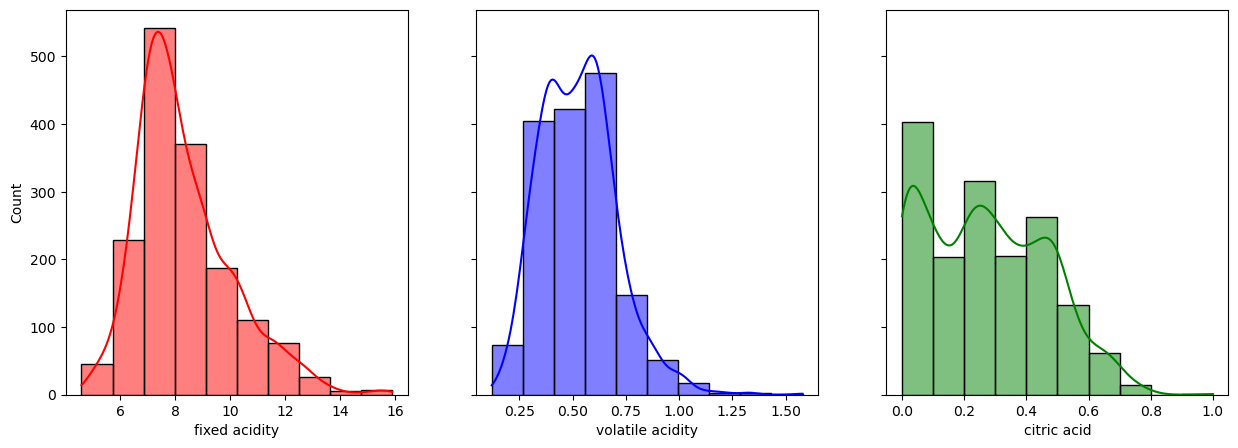

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['fixed acidity'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['volatile acidity'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['citric acid'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)

`Fixed Acidity:`
- Unimodal distribution
- Approximately normal / Gaussian shape but slightly left skewed
- Peak frequency values clustered around 8-9
- Most wines have fixed acidity values in the range of 6-11

`Volatile Acidity:`
- Bimodal distribution with two peaks
- First peak around 0.2-0.4 (lower volatile acidity)
- Second peak around 0.6-0.8 (higher volatile acidity)
- Two clusterings indicate two common levels of volatile acidity

`Citric Acid:`
- Bimodal distribution
- First peak around 0.1-0.2 (lower citric acid)
- Second peak around 0.4-0.6 (higher citric acid)
- Two peaks indicates two common levels of citric acid content

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

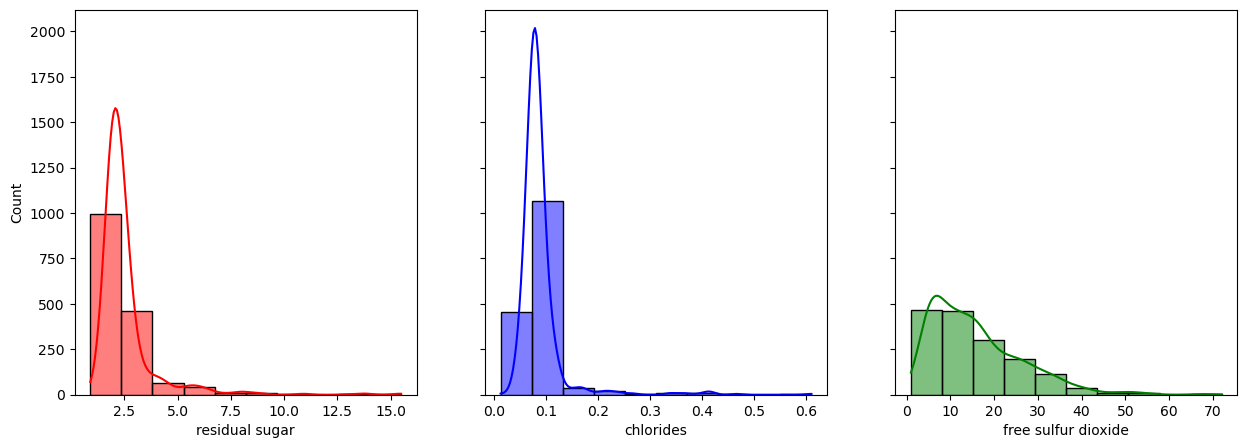

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['residual sugar'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['chlorides'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['free sulfur dioxide'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)


`Residual Sugar:`
- Unimodal distribution, skewed right with a long tail
- Most values clustered on left side between 0-10, with decreasing frequency towards the right
- Indicates most wines have low-moderate residual sugar content

`Chlorides:`
- Unimodal distribution, approximately normal / Gaussian shape
- Peak frequency values centered around 0.05-0.1
- Symmetric bell curve indicates most values clustered around the mean

`Free Sulfur Dioxide:`
- Bimodal distribution with two peaks
- First peak between 0-50 (lower sulfur dioxide)
- Second peak around 125-150 (higher sulfur dioxide)
- Bimodality indicates two common levels of sulfur dioxide content

<Axes: xlabel='pH', ylabel='Count'>

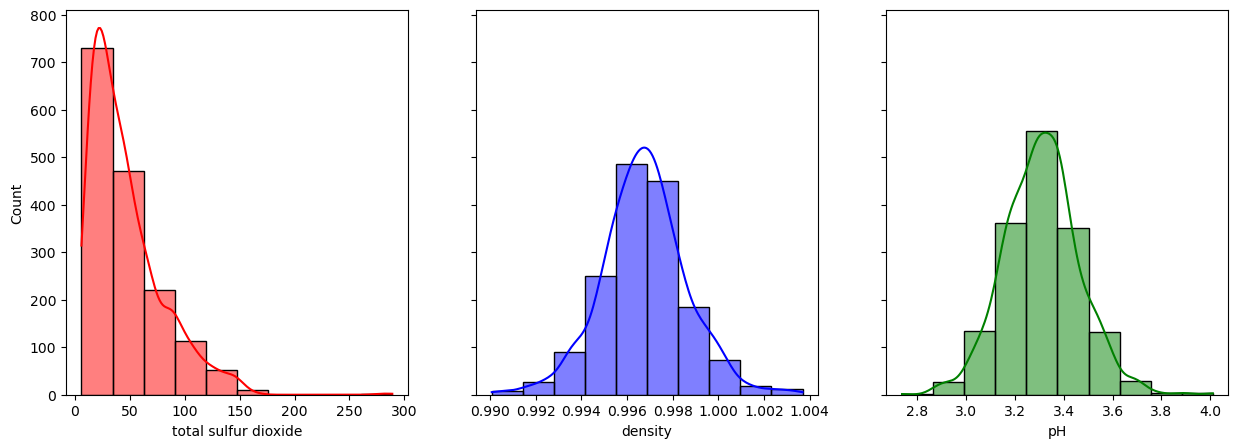

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['total sulfur dioxide'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['density'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['pH'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)

`Total Sulfur Dioxide:`
- Unimodal, right-skewed distribution
- Most values clustered between 50-200 ppm
- Long tail indicates some wines have much higher total SO2

`Density:`
- Unimodal, approximately normal distribution
- Symmetric bell curve shape clustered around 0.99-1.0 g/cm^3
- Indicates most wines have similar density values

`pH:`
- Unimodal distribution, slightly left-skewed
- Most values centered around 3.2-3.4
- Wider spread indicates broader range of pH values

<Axes: xlabel='quality', ylabel='Count'>

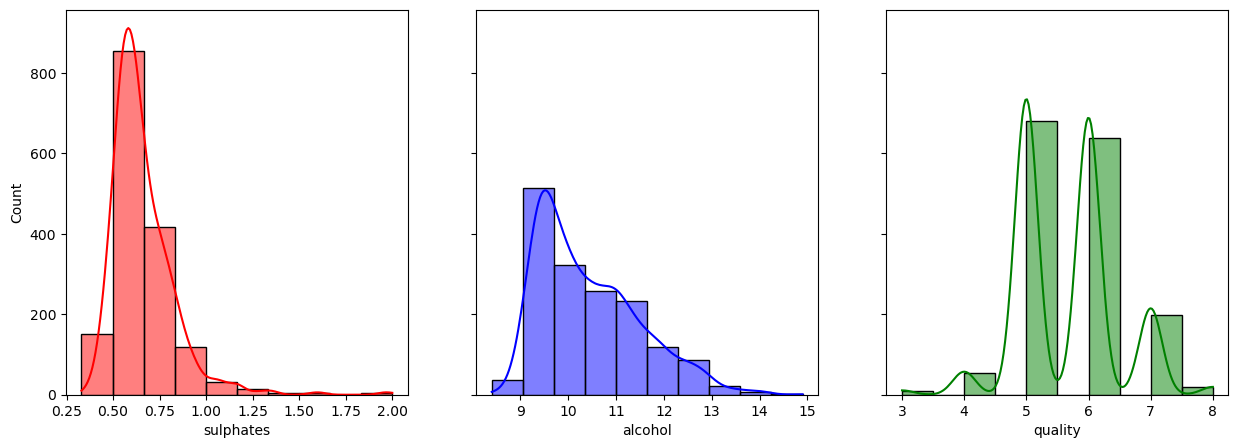

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax= axes[0], x = red_wine['sulphates'], 
                            kde=True, 
                            bins=10, 
                            color='red',
                            cbar=True)

sns.histplot(ax= axes[1], x = red_wine['alcohol'], 
                            kde=True, 
                            bins=10, 
                            color='blue',
                            cbar=True)
                            
sns.histplot(ax= axes[2], x = red_wine['quality'], 
                            kde=True, 
                            bins=10, 
                            color='green',
                            cbar=True)

`Sulphates:`
- Unimodal, right-skewed distribution
- Most values clustered between 0.5-1.5 g/L
- Long tail indicates some wines have much higher sulphate content

`Alcohol:`
- Unimodal, approximately normal distribution
- Symmetric bell curve centered around 10-11% ABV
- Indicates most wines have similar alcohol content

`Quality:`
- Unimodal, slightly left-skewed
- Most values clustered around 5-6 rating
- Left skew indicates more wines with ratings at the lower end

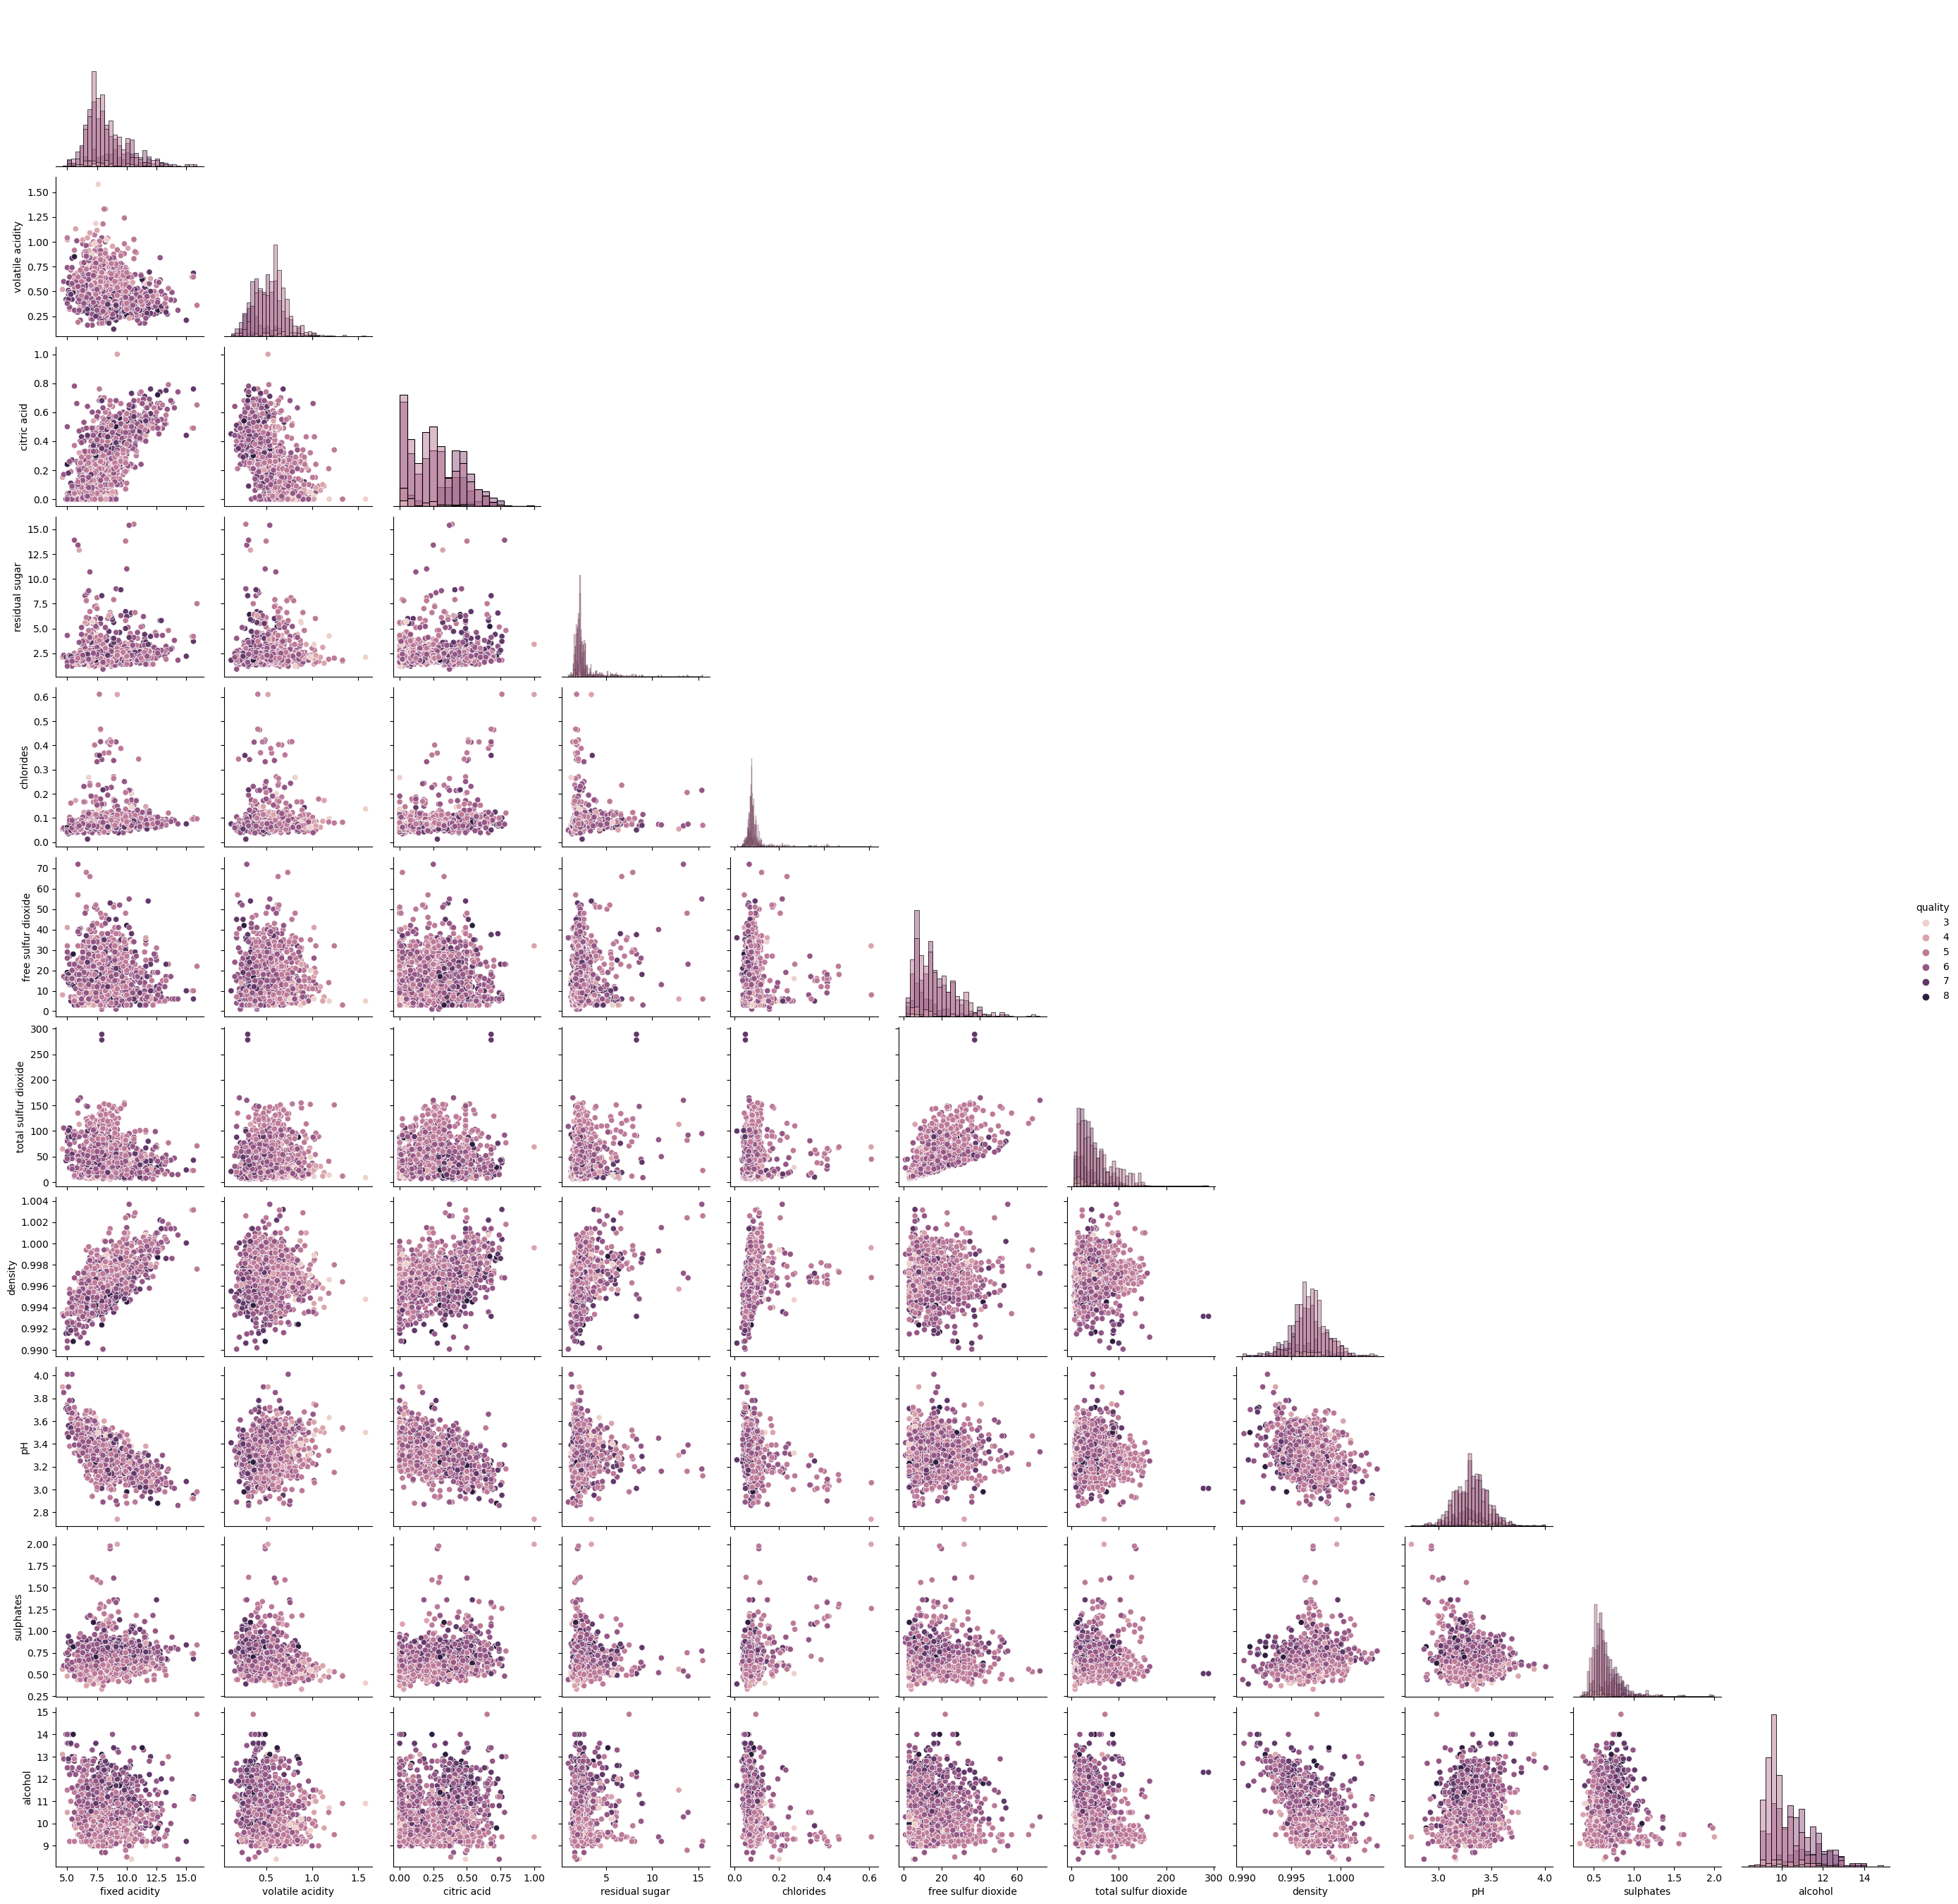

In [35]:
sns.pairplot(data= red_wine, diag_kind = "hist", hue= "quality", corner=True)

We notice that there is `correlation between some variables` and this is called `multicollinearity`
Strong positive correlation between alcohol and quality - higher alcohol is associated with higher quality ratings.
Strong negative correlation between volatile acidity and quality - higher volatile acidity is associated with lower quality.
Moderate positive correlation between density and quality - higher density is weakly associated with higher quality.
Weak correlation between fixed acidity, citric acid, pH, etc and quality - these attributes are not strongly related to quality ratings.
Strong positive correlation between total and free sulfur dioxide - these two measures are highly correlated as expected.
Moderate negative correlation between chlorides and free SO2 - wines with more chlorides tend to have less free SO2.
Residual sugar and density show weak negative correlation - wines with more residual sugar tend to be slightly less dense.

